## Import packages and csv file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/wongwara/Jobseeker_Baymax/main/dataset/listings2019_2022.csv")

## Basic understanding the data set

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3902 entries, 0 to 3901
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   jobId                  3902 non-null   int64  
 1   jobTitle               3902 non-null   object 
 2   jobClassification      3902 non-null   object 
 3   jobSubClassification   3902 non-null   object 
 4   advertiserName         3902 non-null   object 
 5   advertiserId           3902 non-null   int64  
 6   companyId              1067 non-null   float64
 7   companyName            1476 non-null   object 
 8   companyRating          1067 non-null   float64
 9   listingDate            3902 non-null   object 
 10  expiryDate             3902 non-null   object 
 11  teaser                 3374 non-null   object 
 12  nation                 3902 non-null   object 
 13  state                  3902 non-null   object 
 14  city                   3902 non-null   object 
 15  area

In [3]:
df.shape

(3902, 52)

In [4]:
df['state'].unique()

array(['New South Wales', 'Australian Capital Territory', 'Victoria',
       'Western Australia', 'Queensland', 'Northern Territories',
       'South Australia', 'Tasmania', 'UK & Ireland', 'Overseas',
       'Northern Territory'], dtype=object)

In [5]:
df.columns

Index(['jobId', 'jobTitle', 'jobClassification', 'jobSubClassification',
       'advertiserName', 'advertiserId', 'companyId', 'companyName',
       'companyRating', 'listingDate', 'expiryDate', 'teaser', 'nation',
       'state', 'city', 'area', 'suburb', 'workType', 'salary_string',
       'isRightToWorkRequired', 'desktopAdTemplate', 'mobileAdTemplate',
       'companyProfileUrl', 'seekJobListingUrl', 'R', 'Python', 'Matlab',
       'SQL', 'Stata', 'Minitab', 'SPSS', 'Ruby', 'C', 'Scala', 'Tableau',
       'Java', 'Hadoop', 'SAS', 'Julia', 'Knime', 'D3', 'Clojure', 'Haskell',
       'Lisp', 'Golang', 'Spark', 'Javascript', 'F.', 'Fortran', 'first_seen',
       'last_seen', 'recruiter'],
      dtype='object')

In [6]:
df.head()

,jobId,jobTitle,jobClassification,jobSubClassification,advertiserName,advertiserId,companyId,companyName,companyRating,listingDate,...,Haskell,Lisp,Golang,Spark,Javascript,F.,Fortran,first_seen,last_seen,recruiter
0,38098375,Senior Method Development Immunoassay Scientis...,Science & Technology,Biological & Biomedical Sciences,Hobson Prior Australia,30969882,NaN,NaN,NaN,2019-01-16 12:17:41,...,0,0,0,0,0,0,0,2019-03-06,2019-03-11,1
1,38259053,Pricing Data Scientist - Lower North Shore,Information & Communication Technology,Other,Randstad - Technologies,26537413,NaN,NaN,NaN,2019-02-04 13:02:22,...,0,0,0,0,0,0,0,2019-03-06,2019-03-06,1
2,38267899,Insights Analyst – Online Video Streaming,Information & Communication Technology,Database Development & Administration,Aurec,39407892,NaN,NaN,NaN,2019-02-05 11:33:08,...,0,0,0,0,0,0,0,2019-03-06,2019-03-07,1
3,38267995,Credit Risk Analyst,Banking & Financial Services,Compliance & Risk,Huxley Associates,26057722,NaN,NaN,NaN,2019-02-05 11:39:26,...,0,0,0,0,0,0,0,2019-03-06,2019-03-07,1
4,38269206,Data Scientist,Information & Communication Technology,Database Development & Administration,FinXL IT Professional Services,33086778,NaN,NaN,NaN,2019-02-05 12:54:11,...,0,0,0,0,0,0,0,2019-03-06,2019-03-07,0


## Job release per week from 2019 January to 2022 January

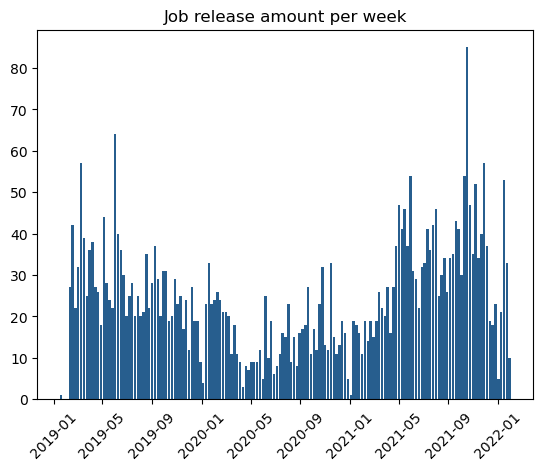

In [7]:
df.index = pd.to_datetime(df['listingDate'])
monthly_count = df.resample('W').size()
monthly_count = monthly_count.reset_index(name = 'count')

plt.bar(monthly_count['listingDate'], monthly_count['count'], width = 6, color = ["#275e8e"])
plt.title('Job release amount per week')
plt.xticks(rotation = 45)
plt.show()

## Companies release more than ten vacancies from January 2019 to January 2022

In [8]:
df['companyName'].unique()

array([nan, 'Macquarie Group', 'Australian National University', 'CSIRO',
       'Hatch', 'CSL Limited', 'Oakton', 'Capgemini', 'Jacobs',
       'DXC Technology', 'Coles Group', 'NRMA Motoring & Services',
       'Menzies School of Health Research', 'CSIRO Manufacturing',
       'Sydney Trains', 'KPMG', 'Telstra', 'Bunnings Warehouse',
       'iSelect', 'Australian Energy Market Operator', 'QBE Insurance',
       'Sportsbet', 'EY', 'Bureau of Meteorology', 'NSW Health',
       'Siemens', 'Deloitte Australia',
       'Office of Environment & Heritage NSW', 'UGL', 'Servian',
       'Arq Group', 'Orica', 'Oracle', 'University of New South Wales',
       'NAB', 'BHP Billiton', 'Commonwealth Bank of Australia',
       'Cognizant', 'Youi Pty Ltd.', 'WorkSafe Victoria', 'Velrada',
       'SA Water', 'Water Corporation WA', 'Stockland',
       'Energy Australia', 'GrainCorp', 'Findex Group', 'Revolution IT',
       'Toyota Financial Services', 'icare', 'Foxtel',
       'Brightstar Logistics', 

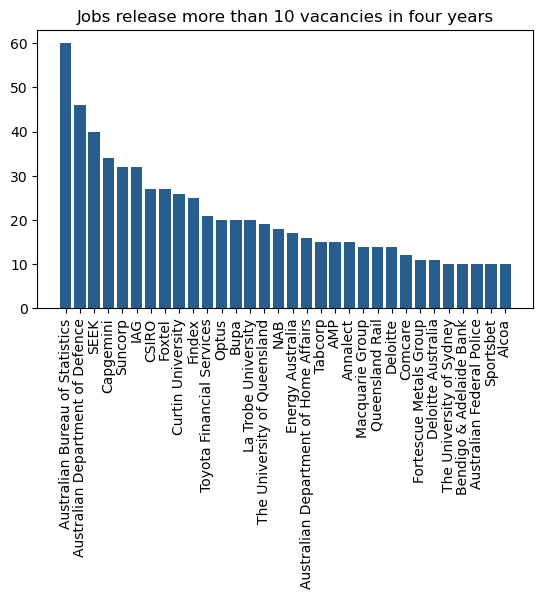

In [9]:
job_vacancy = df['companyName'].value_counts()
job_vacancy_cleaned = pd.Series(job_vacancy.loc[job_vacancy >= 10])
plt.bar(job_vacancy_cleaned.index, job_vacancy_cleaned, color = ["#275e8e"])
plt.xticks(rotation = 90)
plt.subplots_adjust(bottom=0.3)
plt.title('Jobs release more than 10 vacancies in four years')
plt.show()

## Visualise Popular Programming

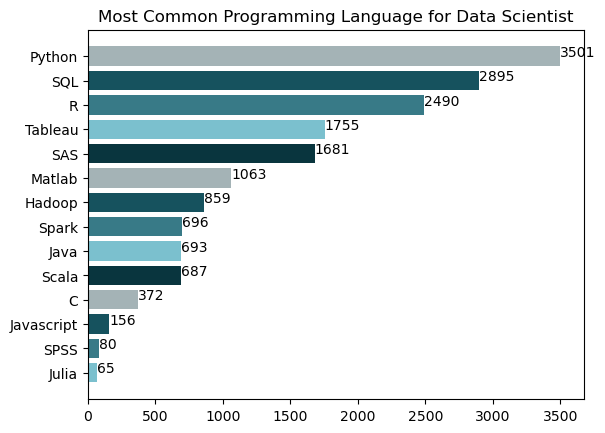

<Figure size 1200x1200 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
sum_programming = df.iloc[:, 24:49].sum()
sum_programming_cleaned = pd.Series(sum_programming.loc[sum_programming >= 50])
sum_programming_cleaned = sum_programming_cleaned.sort_values()

plt.barh(sum_programming_cleaned.index, sum_programming_cleaned, color = ["#7bc0ce", "#387a87", "#16525e","#a4b3b6", "#09353e"])
for i, v in enumerate(sum_programming_cleaned):
    plt.text(v, i, str(v))
plt.title('Most Common Programming Language for Data Scientist')
plt.figure(figsize = (12, 12))
plt.show()

## Every year languages difference

Index(['2019', '2020', '2021', '2022'], dtype='object', name='listingYear')


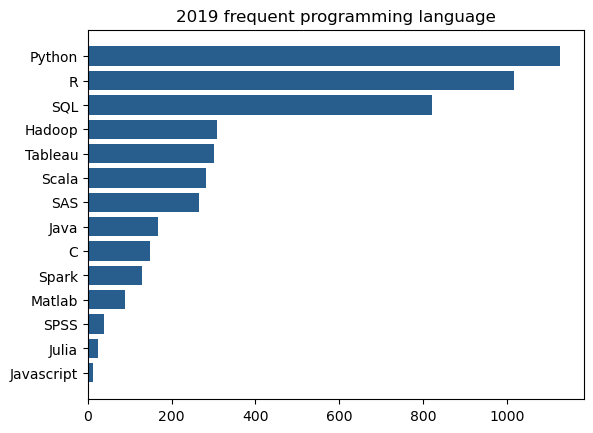

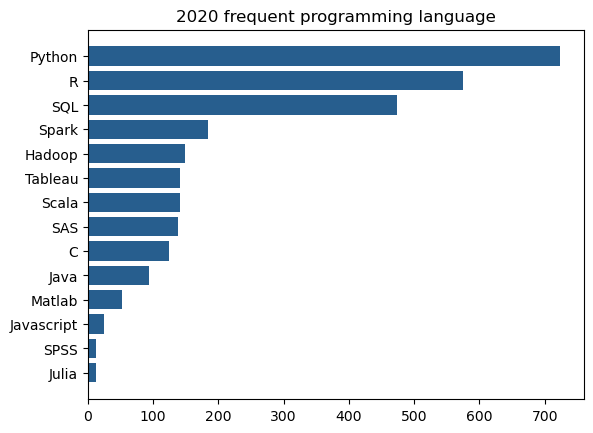

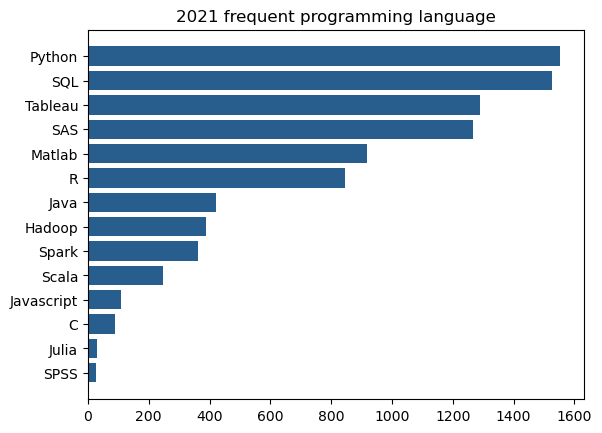

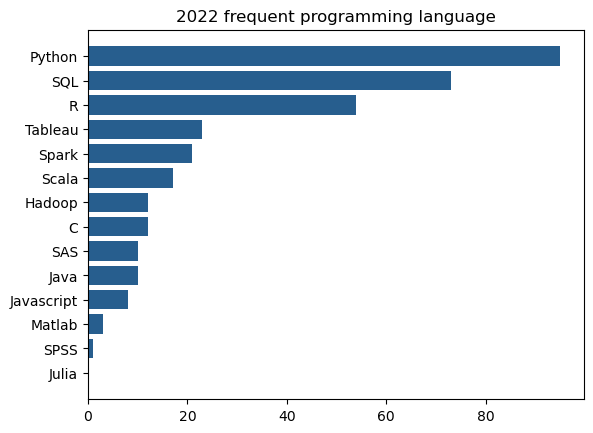

In [11]:
from datetime import datetime
df['listingDate'] = pd.to_datetime(df['listingDate'], format='%Y-%m-%d %H:%M:%S')
df['listingYear'] = df['listingDate'].dt.strftime('%Y')


df_lang = df.iloc[:, 24:49]
sum_languages = df_lang.sum()
sum_languages = sum_languages.sort_values()
df_lang_cleaned = df_lang.loc[:, sum_languages >= 50]

grouped = df_lang_cleaned.groupby(df['listingYear']).sum()

print(grouped.index)

years = grouped.index

for year in years:
    values = grouped.loc[year]
    sorted_values = sorted(zip(values.values, values.index))
    sorted_languages = [x[1] for x in sorted_values]
    sorted_counts = [x[0] for x in sorted_values]
    
    plt.barh(sorted_languages, sorted_counts,color = ["#275e8e"])
    plt.title( str(year) + " frequent programming language")
    plt.show()


## Jobs Vacancies in different states in AU

In [12]:
print(df['state'].unique())
# there are eight states in AU, but "Northern Territories" and "Northern Territory" are founded duplicate
df['state'] = df['state'].replace('Northern Territories', 'Northern Territory')

['New South Wales' 'Australian Capital Territory' 'Victoria'
 'Western Australia' 'Queensland' 'Northern Territories' 'South Australia'
 'Tasmania' 'UK & Ireland' 'Overseas' 'Northern Territory']


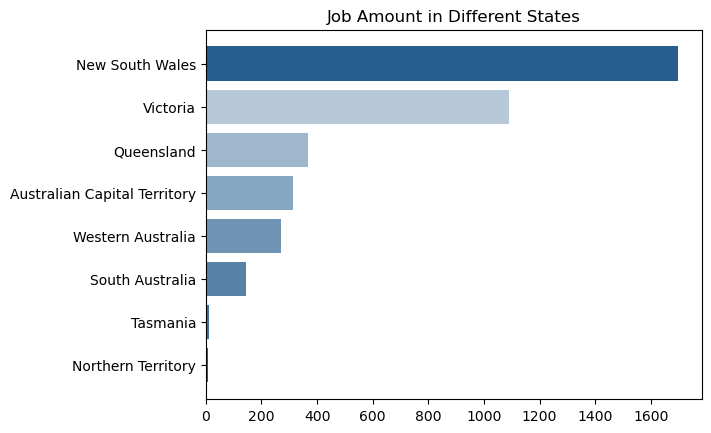

In [13]:
#data preprocessing
state_name = ['New South Wales', 'Australian Capital Territory', 'Victoria','Western Australia', 'Queensland', 'Northern Territory', 'South Australia', 'Tasmania']
job_amount = df['state'].value_counts()

df_jobinAU = pd.DataFrame(columns = ['amount'], index = state_name)

for state in job_amount.index:
    if state in state_name:
        df_jobinAU['amount'][state] = job_amount[state]

df_jobinAU = df_jobinAU.sort_values('amount')

plt.barh(df_jobinAU.index, df_jobinAU['amount'], color = ["#275e8e", "#3f709a", "#5782a7", "#6f94b3", "#87a6c0", "#9fb7cd", "#b7c9d9"])

plt.title('Job Amount in Different States')
plt.show()

## Different states are in different languages

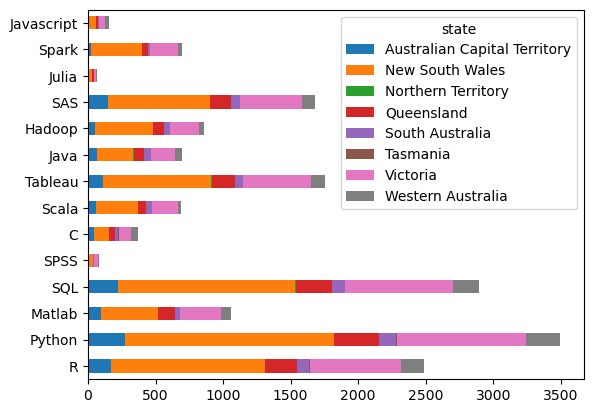

In [14]:
df_lang = df.iloc[:, 24:49]
sum_languages = df_lang.sum()
sum_languages = sum_languages.sort_values()
df_lang_cleaned = df_lang.loc[:, sum_languages >= 50]

grouped = df_lang_cleaned.groupby(df['state']).sum()

grouped = grouped.drop(['Overseas', 'UK & Ireland'], axis = 0)

grouped.T.plot.barh(stacked=True)
plt.show()
        